In [1]:
import pandas as pd
import numpy as np
from utils.config import norway_config

# Paper plots Norway

Energy Dragon

In [2]:
# ED SSEA
ssea = pd.read_csv('dataset/save_norway/ssea/best_model/best_model_test_outputs.csv')
ssea.set_index('Date', inplace=True)
ssea.index = pd.to_datetime(ssea.index)
ssea = ssea[norway_config['Borders']['Border1s'][2]: norway_config['Borders']['Border2s'][2]]
ssea.rename(columns={"Pred": "SSEA_Pred"}, inplace=True)


# ED SSEA Crossover
ssea_crossover = pd.read_csv('dataset/save_norway/ssea_crossover/best_model/best_model_test_outputs.csv')
ssea_crossover.set_index('Date', inplace=True)
ssea_crossover.index = pd.to_datetime(ssea_crossover.index)
ssea_crossover = ssea_crossover[norway_config['Borders']['Border1s'][2]: norway_config['Borders']['Border2s'][2]]
ssea_crossover.rename(columns={"Pred": "SSEA_GA_Pred"}, inplace=True)

GAM

In [3]:
gam = pd.read_csv('dataset/save_norway/gam.csv', sep=";", decimal=",")
gam.set_index('date', inplace=True)
gam.index = pd.to_datetime(gam.index)
gam = gam[norway_config['Borders']['Border1s'][2]: norway_config['Borders']['Border2s'][2]]
gam.rename(columns={"prevision": "GAM_Pred"}, inplace=True)

AutoPytorch

In [4]:
autopytorch = pd.read_csv('dataset/save_norway/trad_autopytorch.csv')
autopytorch.set_index('Date', inplace=True)
autopytorch.index = pd.to_datetime(autopytorch.index)
autopytorch.rename(columns={"Pred": "AutoPytorch_Pred"}, inplace=True)

In [5]:
merged = gam.merge(ssea, left_index=True, right_index=True).drop('Actual', axis=1)
merged = merged.merge(autopytorch, left_index=True, right_index=True).drop('Actual', axis=1)
merged = merged.merge(ssea_crossover, left_index=True, right_index=True).drop('Actual', axis=1)

In [17]:
from utils.metrics import MAPE, RMSE, SMAPE

for c in merged.columns:
    if "Pred" in c:
        name = c[:-5]
        print(f"{name}: MAPE = {np.round(MAPE(merged['Load'], merged[c])*100,3)}%, RMSE = {np.round(RMSE(merged['Load'], merged[c]),1)}, SMAPE = {np.round(SMAPE(merged['Load'], merged[c]),3)}%")

GAM: MAPE = 2.43%, RMSE = 474.0, SMAPE = 2.449%
SSEA: MAPE = 2.196%, RMSE = 465.7, SMAPE = 2.205%
AutoPytorch: MAPE = 3.429%, RMSE = 660.7, SMAPE = 3.492%
SSEA_GA: MAPE = 2.019%, RMSE = 426.3, SMAPE = 2.017%


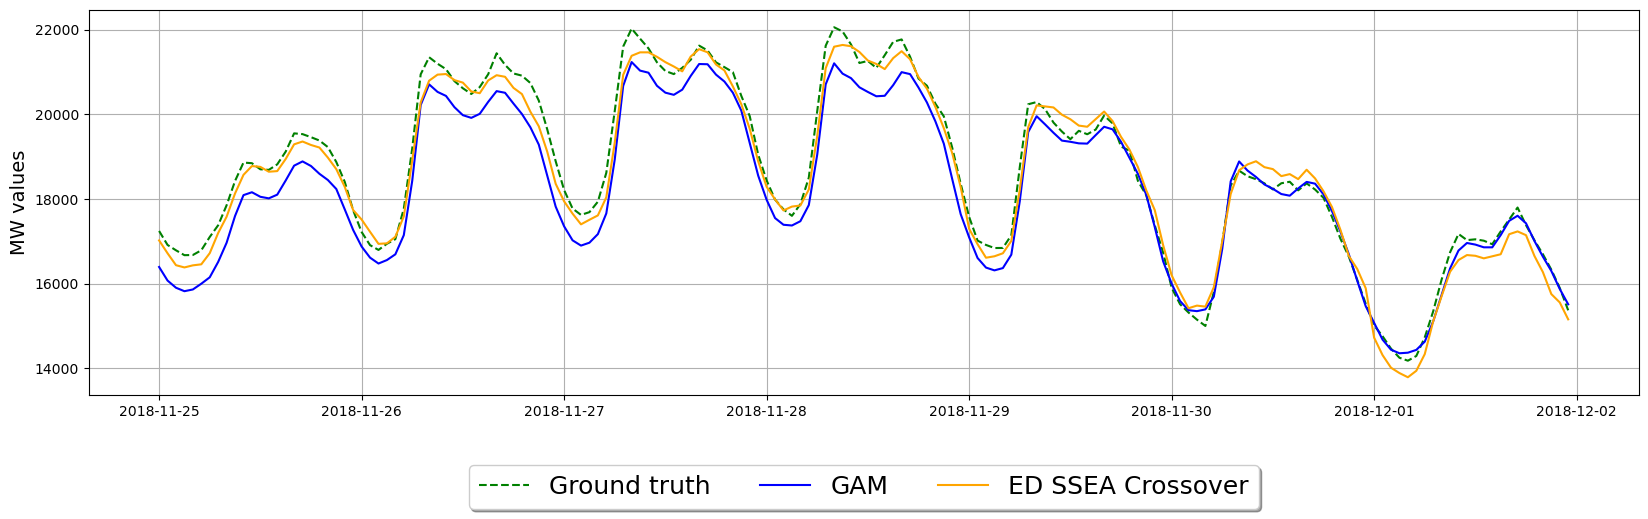

In [7]:
rnn_plot = merged[((merged.index.month==11)&(merged.index.day>24))|((merged.index.month==12)&(merged.index.day==1))]

import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

plt.plot(rnn_plot.index, rnn_plot['Load'], '--', c='g', label='Ground truth')
plt.plot(rnn_plot.index, rnn_plot['GAM_Pred'], c='b', label='GAM')
plt.plot(rnn_plot.index, rnn_plot['SSEA_GA_Pred'], c='orange',  label='ED SSEA Crossover')


plt.grid()
plt.ylabel('MW values', fontsize=14)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=4, fontsize="18") 
plt.savefig('dataset/save/figures/gam_vs_energydragon.pdf', bbox_inches='tight') 

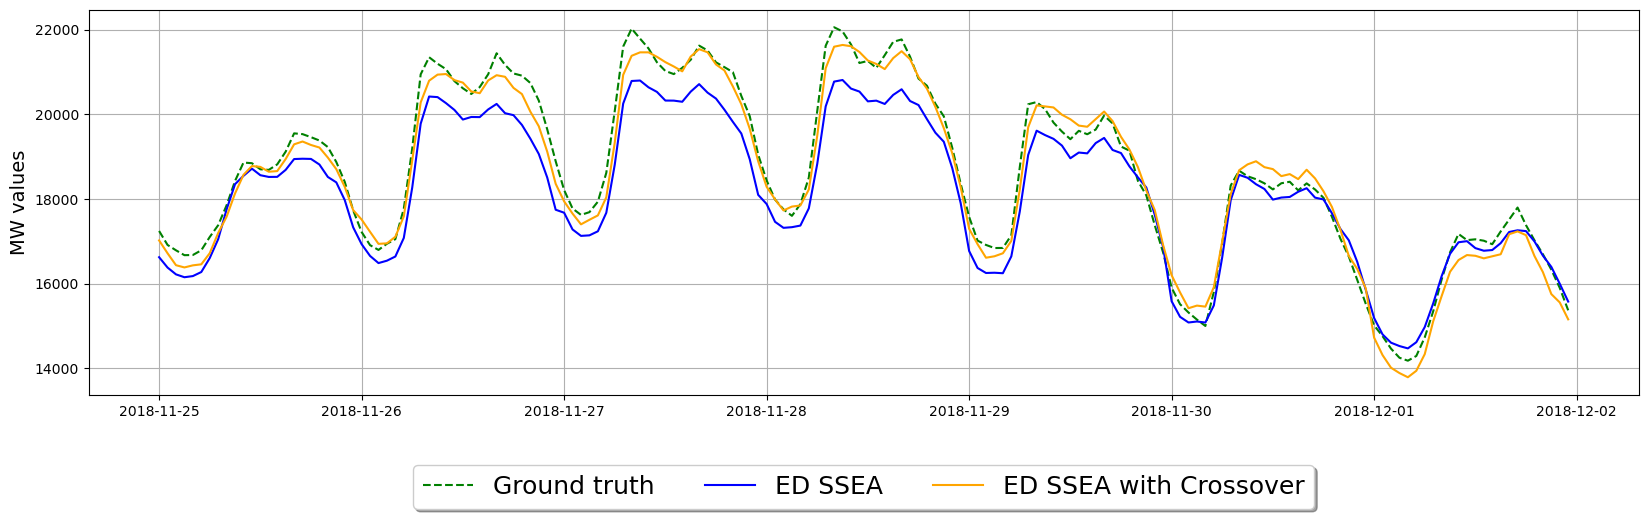

In [8]:
rnn_plot = merged[((merged.index.month==11)&(merged.index.day>24))|((merged.index.month==12)&(merged.index.day==1))]

import matplotlib.pyplot as plt

n=1000
plt.figure(figsize=(20,5))

plt.plot(rnn_plot.index, rnn_plot['Load'], '--', c='g', label='Ground truth')
plt.plot(rnn_plot.index, rnn_plot['SSEA_Pred'], c='b', label='ED SSEA')
plt.plot(rnn_plot.index, rnn_plot['SSEA_GA_Pred'], c='orange',  label='ED SSEA with Crossover')


plt.grid()
#plt.xlabel('Dates', fontsize=14)
plt.ylabel('MW values', fontsize=14)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=4, fontsize="18") 
plt.savefig('dataset/save/figures/energydragon_with_vs_without_crossover.pdf')

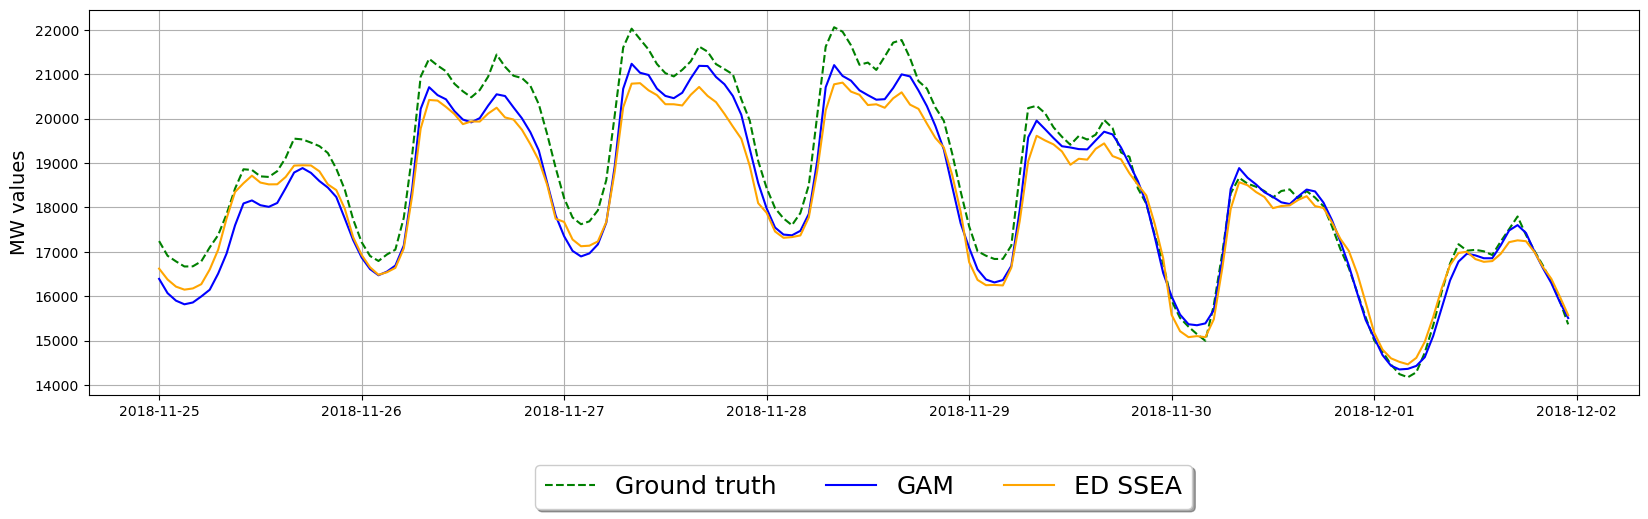

In [9]:
rnn_plot = merged[((merged.index.month==11)&(merged.index.day>24))|((merged.index.month==12)&(merged.index.day==1))]

import matplotlib.pyplot as plt

n=1000
plt.figure(figsize=(20,5))

plt.plot(rnn_plot.index, rnn_plot['Load'], '--', c='g', label='Ground truth')
plt.plot(rnn_plot.index, rnn_plot['GAM_Pred'], c='b', label='GAM')
plt.plot(rnn_plot.index, rnn_plot['SSEA_Pred'], c='orange',  label='ED SSEA')


plt.grid()
#plt.xlabel('Dates', fontsize=14)
plt.ylabel('MW values', fontsize=14)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=4, fontsize="18") 
plt.savefig('dataset/save/figures/gam_vs_ssea_wo_crossover.pdf', bbox_inches='tight')

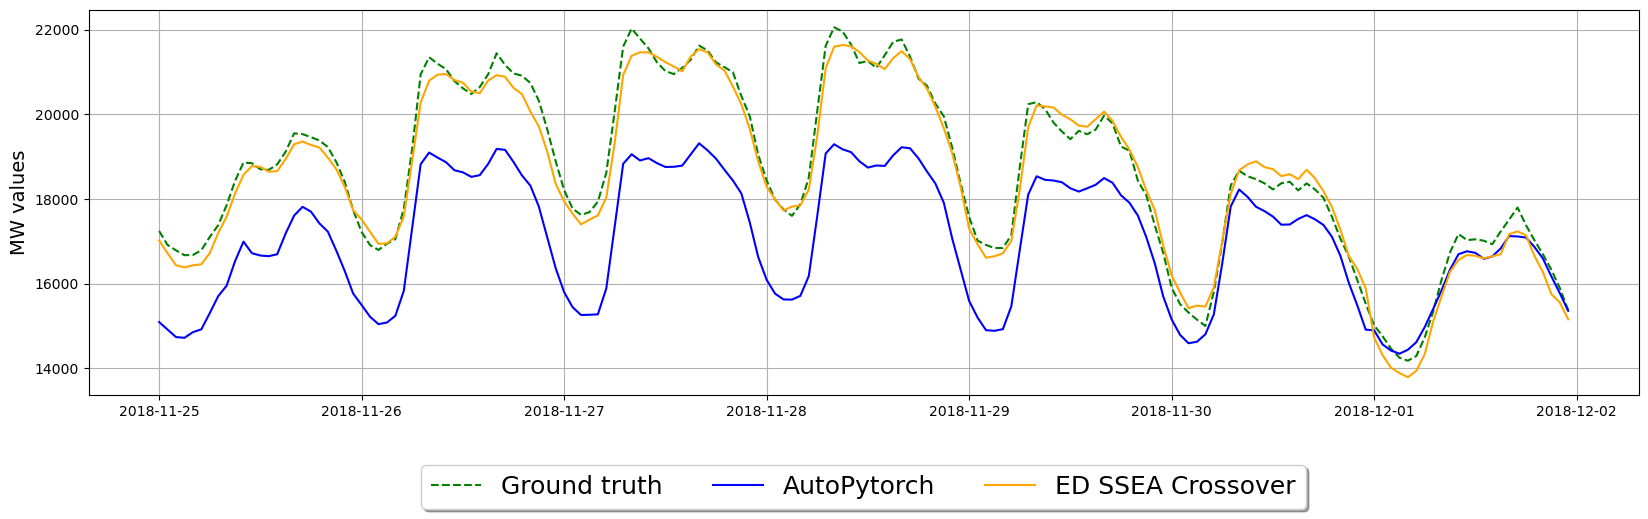

In [10]:
rnn_plot = merged[((merged.index.month==11)&(merged.index.day>24))|((merged.index.month==12)&(merged.index.day==1))]

import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

plt.plot(rnn_plot.index, rnn_plot['Load'], '--', c='g', label='Ground truth')
plt.plot(rnn_plot.index, rnn_plot['AutoPytorch_Pred'], c='b', label='AutoPytorch')
plt.plot(rnn_plot.index, rnn_plot['SSEA_GA_Pred'], c='orange',  label='ED SSEA Crossover')


plt.grid()
#plt.xlabel('Dates', fontsize=14)
plt.ylabel('MW values', fontsize=14)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=4, fontsize="18") 
plt.savefig('dataset/save/figures/autopytorch_vs_energydragon.pdf', bbox_inches='tight')

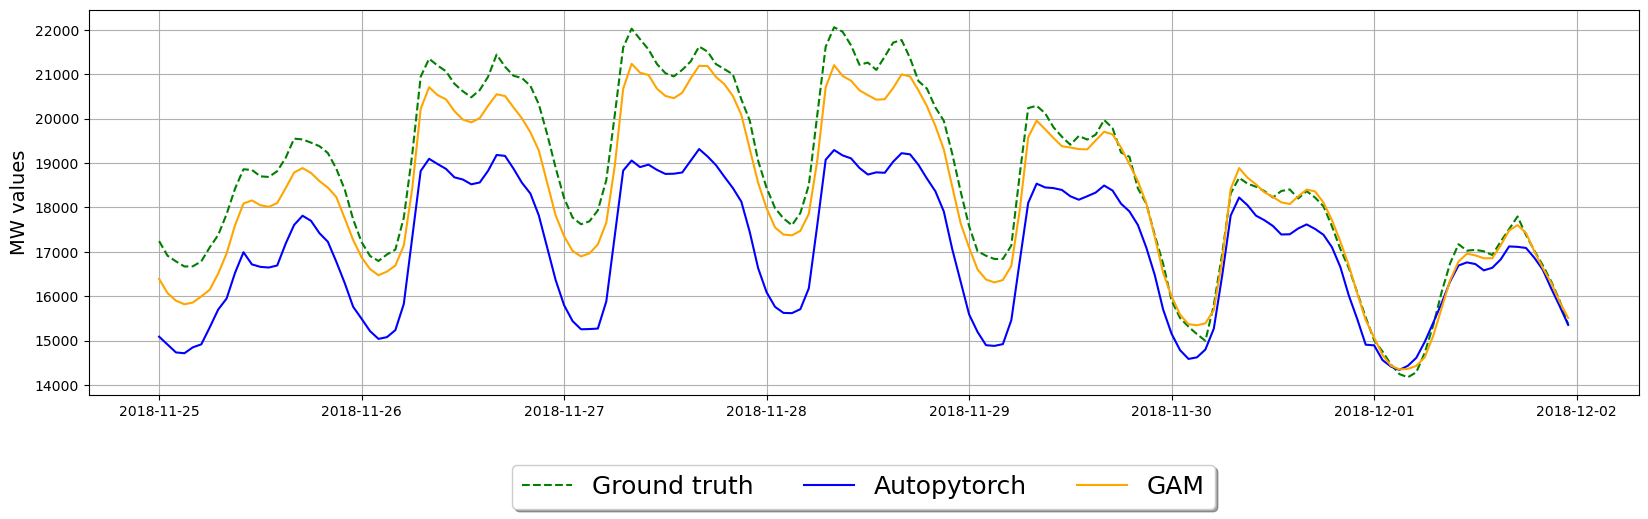

In [11]:
rnn_plot = merged[((merged.index.month==11)&(merged.index.day>24))|((merged.index.month==12)&(merged.index.day==1))]

import matplotlib.pyplot as plt

n=1000
plt.figure(figsize=(20,5))

plt.plot(rnn_plot.index, rnn_plot['Load'], '--', c='g', label='Ground truth')
plt.plot(rnn_plot.index, rnn_plot['AutoPytorch_Pred'], c='b', label='Autopytorch')
plt.plot(rnn_plot.index, rnn_plot['GAM_Pred'], c='orange',  label='GAM')


plt.grid()
#plt.xlabel('Dates', fontsize=14)
plt.ylabel('MW values', fontsize=14)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=4, fontsize="18") 
plt.savefig('dataset/save/figures/autopytorch_vs_gam.pdf', bbox_inches='tight')

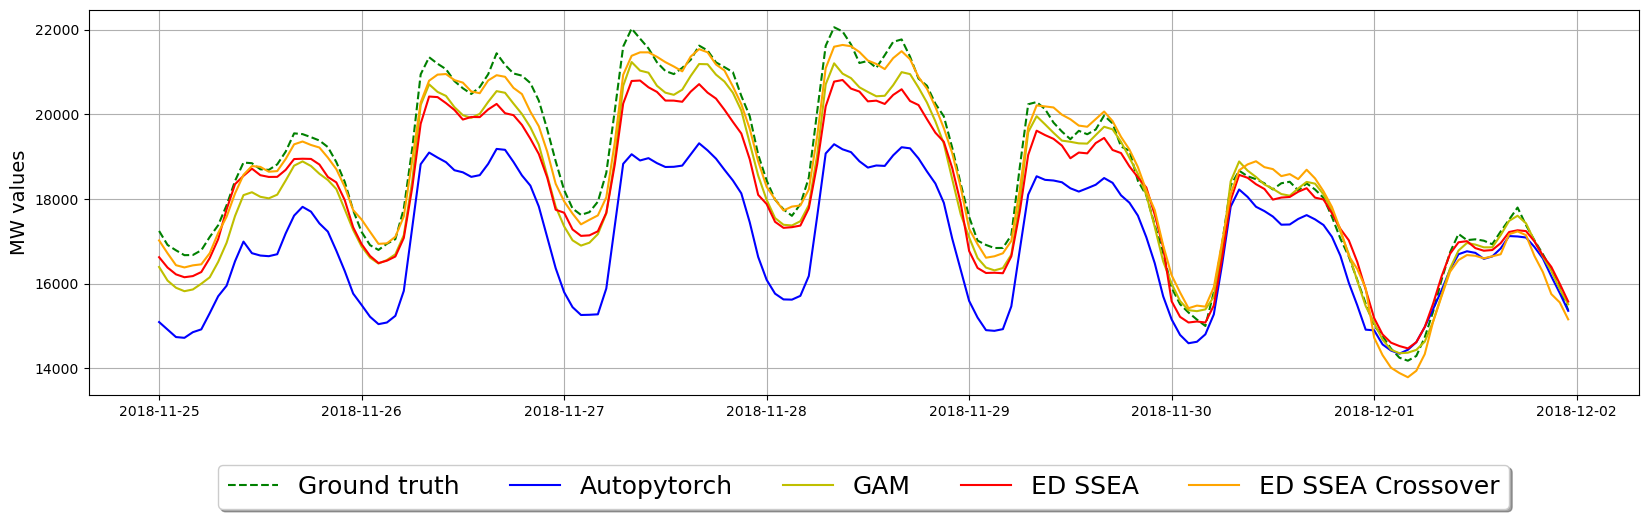

In [12]:
rnn_plot = merged[((merged.index.month==11)&(merged.index.day>24))|((merged.index.month==12)&(merged.index.day==1))]

import matplotlib.pyplot as plt

n=1000
plt.figure(figsize=(20,5))

plt.plot(rnn_plot.index, rnn_plot['Load'], '--', c='g', label='Ground truth')
plt.plot(rnn_plot.index, rnn_plot['AutoPytorch_Pred'], c='b', label='Autopytorch')
plt.plot(rnn_plot.index, rnn_plot['GAM_Pred'], c='y',  label='GAM')
plt.plot(rnn_plot.index, rnn_plot['SSEA_Pred'], c='r',  label='ED SSEA')
plt.plot(rnn_plot.index, rnn_plot['SSEA_GA_Pred'], c='orange',  label='ED SSEA Crossover')


plt.grid()
#plt.xlabel('Dates', fontsize=14)
plt.ylabel('MW values', fontsize=14)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5, fontsize="18") 
plt.savefig('dataset/save_norway/figures/all_vs_all.pdf', bbox_inches='tight')

# Architectures found

In [13]:
from dragon.utils.plot_functions import load_archi, str_operations, draw_graph, get_name_features


ssea_model = load_archi("dataset/save_norway/ssea/best_model/x.pkl")
ssea_features = get_name_features(ssea_model[0], norway_config)
m1 = ssea_model[1].matrix
n1 = str_operations(ssea_model[1].operations)
m2 = ssea_model[2].matrix
n2 = str_operations(ssea_model[2].operations)

graph = draw_graph(n1, m1, n2, m2, "dataset/save_norway/figures/ssea")
print(ssea_features)

['f_1', 'f_3', 'f_5', 'f_7', 'f_10', 'f_11', 'f_13', 'f_14', 'f_15', 'f_16', 'f_23', 'f_25', 'f_28', 'f_30', 'f_32', 'f_33', 'f_34']


In [14]:
ssea_ga_model = load_archi("dataset/save_norway/ssea_crossover/best_model/x.pkl")
ssea_ga_features = get_name_features(ssea_ga_model[0], norway_config)
m1 = ssea_ga_model[1].matrix
n1 = str_operations(ssea_ga_model[1].operations)
m2 = ssea_ga_model[2].matrix
n2 = str_operations(ssea_ga_model[2].operations)

graph = draw_graph(n1, m1, n2, m2, "dataset/save_norway/figures/ssea_crossover")
print(ssea_ga_features)

['f_2', 'f_3', 'f_4', 'f_8', 'f_9', 'f_14', 'f_21', 'f_24', 'f_25', 'f_28', 'f_29', 'f_32', 'f_34']


# Features

In [15]:
f_features = {}
f_features["ED SSEA"] = ssea_features
f_features["ED SSEA Crossover"] = ssea_ga_features

In [16]:
y

NameError: name 'y' is not defined

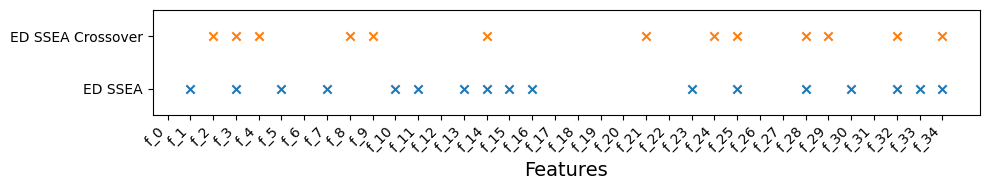

In [ ]:
plt.figure(figsize=(10, 2))
main_list = [f"f_{i}" for i in range(len(norway_config['Features']))]

for i, name in enumerate(f_features):
    sublist = f_features[name]
    y = [i] * len(sublist)  
    x = [main_list.index(item) for item in sublist]  
    plt.scatter(x, y, marker='x', label=f'{name}')

plt.yticks(range(len(f_features)), [f'{k}' for k in f_features.keys()])
plt.xticks(range(len(main_list)), main_list, rotation=45, ha='right')
plt.xlabel('Features', fontsize=14)
plt.tight_layout()
plt.ylim(-0.5, 1.5)
plt.savefig('dataset/save_norway/figures/features_by_model.pdf', bbox_inches='tight')
plt.show()


# Convergence

In [ ]:
def summary_outfile(path, name):
    timestamps = []
    losses = []
    min_loss = np.inf
    rs_over = True
    with open(path) as f:
        lines_list = f.readlines()
        for i, l in enumerate(lines_list):
            if not rs_over:
                if "Sending individual" in l:
                    l_split = l.split(" ")
                    idx = int(l_split[7])
                    if idx==99:
                        rs_over=True
            else:
                if "criterium on test dataset:" in l:
                    l_split = l.split("|")
                    ts = l_split[0][:-1]
                    l_split = l.split(" ")
                    loss = float(l_split[-1])
                    if loss < min_loss:
                        min_loss = loss
                        timestamps.append(ts)
                        losses.append(loss)
    df_ssea = pd.DataFrame()
    df_ssea['TimeStamps'] = timestamps
    df_ssea[name] = losses
    #df_ssea[name] = df_ssea[name].cummin()
    df_ssea['TimeStamps'] = pd.to_datetime(df_ssea['TimeStamps'])
    df_ssea.set_index("TimeStamps", inplace=True)
    
    df_ssea.index = (df_ssea.index - df_ssea.index[0]).total_seconds()
    df_ssea = df_ssea[df_ssea.index<3600*24]
    df_ssea.index = df_ssea.index/3600
    df_ssea.index = df_ssea.index.astype(float).to_series().round(3)
    df_ssea.reset_index(drop=False, inplace=True)
    return df_ssea

In [ ]:
df_ssea = summary_outfile("dataset/save_norway/ssea.out", "SSEA")
df_ssea_ga = summary_outfile('dataset/save_norway/ssea_crossover.out', "SSEA Crossover")

In [ ]:
merged = df_ssea.merge(df_ssea_ga, how="outer")
merged.sort_values(by="TimeStamps", inplace=True)
merged.fillna(method="ffill", inplace=True)
merged.set_index('TimeStamps', inplace=True)


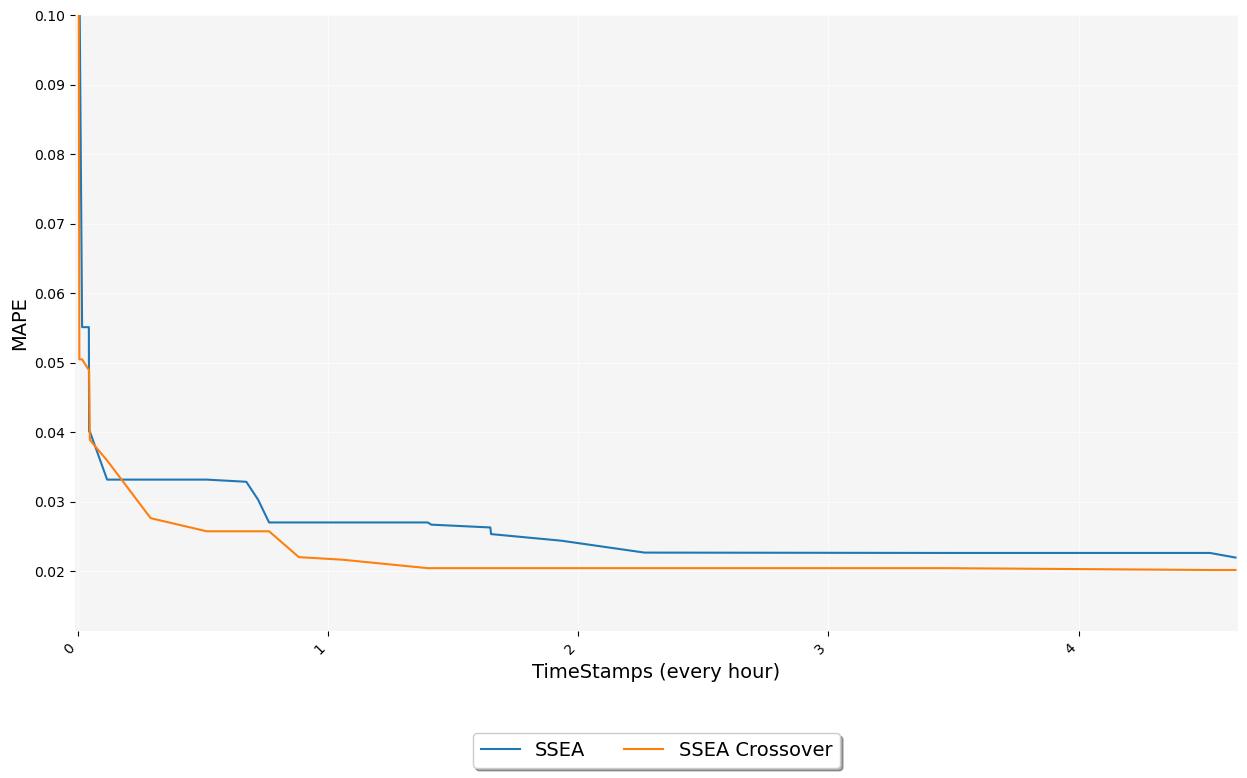

In [ ]:
plt.rc('font', family='sans-serif')    
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_facecolor((0.96, 0.96, 0.96))
plt.margins(x=20e-4)

df = merged[['SSEA', 'SSEA Crossover']]

for c in df.columns:
    plt.plot(df.index, df[c], label=c)

plt.xticks(df.index, rotation=45, ha='right')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

plt.xlabel('TimeStamps (every hour)', fontsize=14)
plt.ylabel('MAPE', fontsize=14)

plt.ylim(top=0.1)
plt.grid(color='white', lw = 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5, fontsize="14") 
plt.savefig('dataset/save_norway/figures/convergence_energy_dragon.pdf', bbox_inches='tight') 